In [ ]:
import pandas as pd

#Importing other files

import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000

pd.options.display.max_colwidth = 1_000

In [ ]:
df = pd.read_csv('mock_data.csv', encoding='Latin-1')

In [ ]:
df.head()

,User_id,Food_name,Food_categories,Food_price,Restaurant,Rating,Review,Food_description,restaurant_location
0,5367,Spring Rolls,Starters and Appetizers,400,Naija Delights,3,Delicious food! Loved the flavors.,"('Spring Rolls are crispy pastry rolls filled with a mixture of vegetables, meat, or seafood. They are deep-fried until golden and are often served as appetizers or snacks.',)",Mainland
1,6583,Zobo (Hibiscus) Drink,Desserts and Beverages,500,Suya Palace,5,Great service and quality. Highly recommend.,"('Zobo Drink is a refreshing Nigerian beverage made from dried hibiscus petals, ginger, and other spices. It is usually sweetened with sugar or natural sweeteners and served chilled.',)",Mainland
2,5016,Ewa Agoyin with Agege Bread,Nigerian Delicacies,800,Naija Delights,3,Good portion size and value for money.,"('Ewa Agoyin is a spicy Nigerian bean stew made with cooked beans and a special sauce made from palm oil, onions, and peppers. It is typically served with Agege Bread, a soft and fluffy bread popular in Nigeria.',)",Mainland
3,2144,Fisherman's Soup with Eba,Seafood Delights,3200,Taste of Lagos,1,Food arrived late and order was incorrect.,"(""Fisherman's Soup is a spicy Nigerian soup made with a variety of seafood such as fish, prawns, and crabs. It is often enjoyed with Eba, a dough-like accompaniment made from cassava."",)",Island
4,3329,Puff Puff,Starters and Appetizers,300,Naija Delights,3,Delicious food! Loved the flavors.,"('Puff Puff is a popular Nigerian snack made from a simple batter of flour, sugar, yeast, and water. It is deep-fried until golden brown and has a fluffy, doughnut-like texture.',)",Mainland


In [ ]:
    print(f"""
          ===dtypes===
          
          {df.dtypes}
          
          ===NaN Values===
          
          {df.isna().sum()}
          
          ====shape=====
          
          The dataset has {df.shape[0]} rows and {df.shape[1]} columns
          
          ===Unique Values in each feature===
          
          {df.nunique()}
        
          
          """)


      ===dtypes===
      
      User_id                 int64
Food_name              object
Food_categories        object
Food_price              int64
Restaurant             object
Rating                  int64
Review                 object
Food_description       object
restaurant_location    object
dtype: object
      
      ===NaN Values===
      
      User_id                0
Food_name              0
Food_categories        0
Food_price             0
Restaurant             0
Rating                 0
Review                 0
Food_description       0
restaurant_location    0
dtype: int64
      
      ====shape=====
      
      The dataset has 100000 rows and 9 columns
      
      ===Unique Values in each feature===
      
      User_id                9000
Food_name                73
Food_categories          21
Food_price               20
Restaurant                4
Rating                    5
Review                   10
Food_description         70
restaurant_location       2
dtype

From the above, the exploration sjows the structure and format of the data set, and also checked for missing values, 
from the data set, there are no missing values.

The data has 100000 rows and 9 columns. 
There are 73 food types that can be ordered from 4 unique restaurants and there are about 63,337 people that have used the mealy app so far. There are only three numerical variables in the dataset which are the `User_id` , `Food_price` and `Rating`

In [97]:
df.describe()

,User_id,Food_price,Rating
count,100000.000000,100000.000000,100000.000000
mean,5490.223950,1754.926000,3.954680
std,2600.527674,974.792304,0.996331
min,1000.000000,200.000000,1.000000
25%,3231.750000,800.000000,4.000000
50%,5482.000000,1800.000000,4.000000
75%,7739.000000,2500.000000,5.000000
max,9999.000000,3800.000000,5.000000


From the description of the numerical variables, the average price of food on the app is ₦1,750 and average rating of foods ordered from resaturants is about 4 stars.

Text(0.5, 1.0, 'distribution of Food_price')

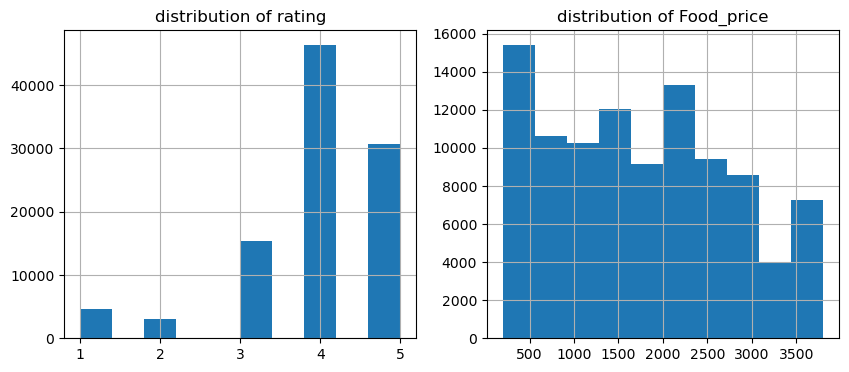

In [102]:

fig,ax=plt.subplots(1,2,figsize=(10,4))

df['Rating'].hist(ax=ax[0])
ax[0].set_title('distribution of rating')
df['Food_price'].hist(ax=ax[1])
ax[1].set_title('distribution of Food_price')

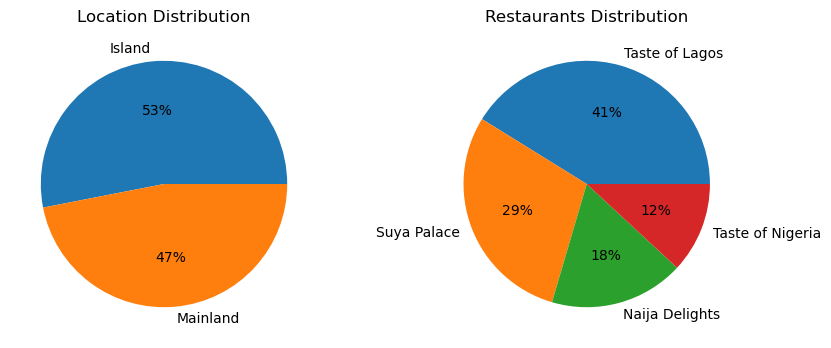

In [108]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].pie(x=df["restaurant_location"].value_counts() ,labels=df["restaurant_location"].value_counts().index, autopct='%.f%%')
ax[0].set_title('Location Distribution')
ax[1].pie(x=df["Restaurant"].value_counts() ,labels=df["Restaurant"].value_counts().index, autopct='%.f%%')
ax[1].set_title('Restaurants Distribution')
plt.show()

### what categories of food are available on our app

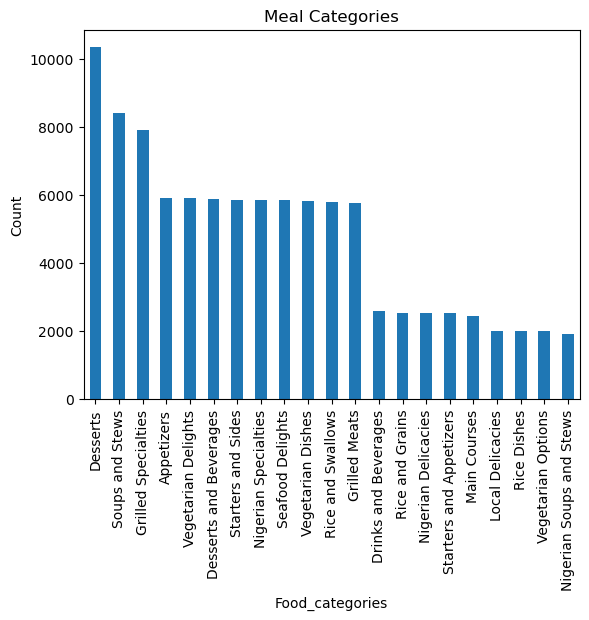

In [5]:
# group by food_categories
category_counts = df['Food_categories'].value_counts()

# Visualizing meal category using bar chart
category_counts.plot(kind='bar')
plt.xlabel('Food_categories')
plt.ylabel('Count')
plt.title('Meal Categories')
plt.show()

From the visualization above, it can be deduced that the most ordered food category is from `Desserts` which is followed by `Soups and Stews` and `Grilled Specialities`.

### What are the most ordered Food

In [6]:
df["Food_name"].value_counts().head()

Jollof Rice with Grilled Chicken    4744
Egusi Soup with Pounded Yam         4652
Peppered Snails                     3519
Fried Rice with Beef Stir-Fry       3284
Plantain Chips                      2581
Name: Food_name, dtype: int64

The most ordered Food_type is Jollof Rice with Grilled Chicken with 4744 orders.



### what restaurants are most expensive on average and is there a relationship with the ratings

In [99]:
df.groupby('Restaurant').agg({'Food_price': 'mean', 'Rating': 'mean'}).sort_values(by='Rating',ascending=False)

,Food_price,Rating
Restaurant,,
Naija Delights,978.066746,3.960791
Suya Palace,1236.545554,3.958885
Taste of Nigeria,1784.341906,3.954278
Taste of Lagos,2448.191600,3.949185


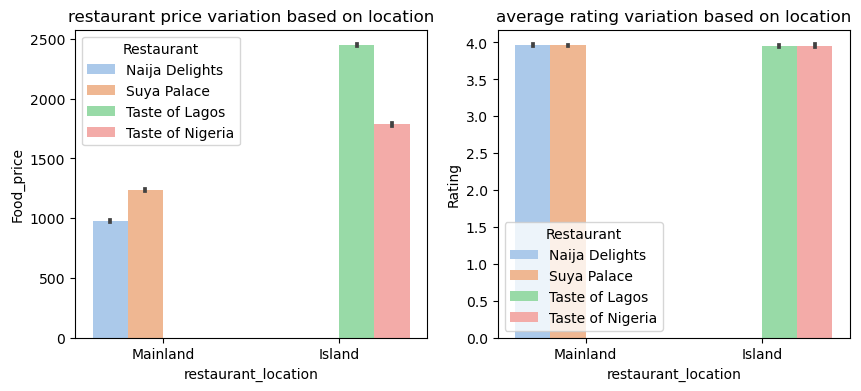

In [8]:
# get the relationship between Restaurant Location and Price


fig,ax=plt.subplots(1,2,figsize=(10,4))


sns.barplot(x='restaurant_location', y='Food_price', data=df, palette='pastel', hue='Restaurant',ax=ax[0])
ax[0].set_title('restaurant price variation based on location')

# get the relationship between Restaurant Location and Rating
sns.barplot(x='restaurant_location', y='Rating', data=df, palette='pastel', hue='Restaurant',ax=ax[1])
ax[1].set_title('average rating variation based on location')

plt.show()

The prices of food from restaurants on the Island is higher than that of those on the Mainland

The ratings of Restaurants on the Mainland and Island are the same

### Top 5 most ordered foods 

In [100]:

df["Food_name"].value_counts().head()

Jollof Rice with Grilled Chicken    4744
Egusi Soup with Pounded Yam         4652
Peppered Snails                     3519
Fried Rice with Beef Stir-Fry       3284
Plantain Chips                      2581
Name: Food_name, dtype: int64

In [101]:
# ratings column distribution

### The percentage of negative and positive reviews for each restaurant

In [54]:
# filtering data base on positive and negative review

positive_reviews = df[df['Rating'] > 2] #any rating greater than 2 is regarded as a positive review
negative_reviews = df[df['Rating'] <= 2]  #any rating greater less than 3 is regarded as negative ratings

#using the value_counts() function to check for the ratings of resturants 
positive_counts = (positive_reviews['Restaurant'].value_counts()/df['Restaurant'].value_counts())*100
negative_counts = (negative_reviews['Restaurant'].value_counts()/df['Restaurant'].value_counts())*100


counts = pd.concat([positive_counts, negative_counts], axis=1)
counts.columns = ['Positive Ratings', 'Negative Ratings']
print(counts)

                  Positive Ratings  Negative Ratings
Taste of Lagos           92.253880          7.746120
Suya Palace              92.419068          7.580932
Naija Delights           92.617145          7.382855
Taste of Nigeria         92.586989          7.413011


All restaurants have about the same percentage of negative and positive reviews so we cant say explicitly if there anyone of the is terrible

### what restaurants have the most orders

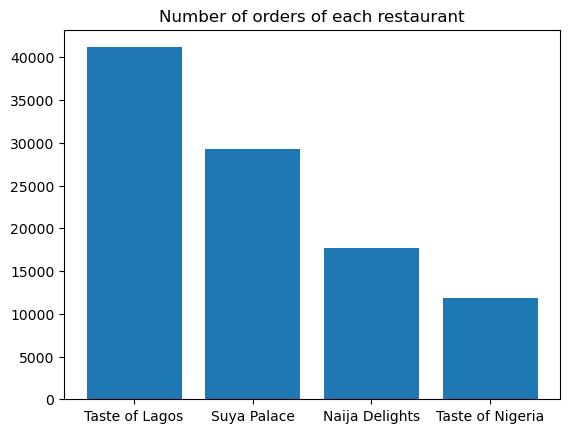

In [27]:
plt.bar(df['Restaurant'].value_counts().index,df['Restaurant'].value_counts())
plt.title('Number of orders of each restaurant')
plt.show()

Taste of lagos has the highest number of orders while Taste of Nigeria has the lowest